<a href="https://colab.research.google.com/github/Vickes21/studies-notebooks/blob/main/%5BMFF%5D-%5BCORRE%C3%87%C3%83O%5D-M%C3%A1ximos_e_M%C3%ADnimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo 1: Máximos e Mínimos Locais

Computadores não são capazes de abstração algébrica, a menos que usemos algoritmos complexos para tanto. Sem usar qualquer abstração algébrica, e usando apenas as operações algébricas. Crie um algoritmo, usando Python e o Google Colaboratory, sem consultar qualquer ferramenta de inteligência artificial, ou buscar no Google, que permita encontrar os pontos de máximo e mínimo da função a seguir que existam no intervalo $0<=x<=10$.

$$f(x)=2x^4 - 32x^3 + 96x^2 + 100$$


## Traçando o Gráfico

In [ ]:
# Instale a biblioteca Plotly, caso não esteja instalada
!pip install plotly

In [ ]:
import numpy as np
import plotly.graph_objects as go

def f(x):
    return 2 * x**4 - 32 * x**3 + 96 * x**2 + 100

# usando o linspace para gerar valores de x tal que 0 < x < 10
x_values = np.linspace(-1, 11, 1000)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x_values, y=f(x_values), mode='lines', name='f(x)'))
fig.update_layout(title='Gráficos das funções f(x) ',
                  xaxis_title='x',
                  yaxis_title='f(x)',
                  legend_title='f(x)')
fig.show()

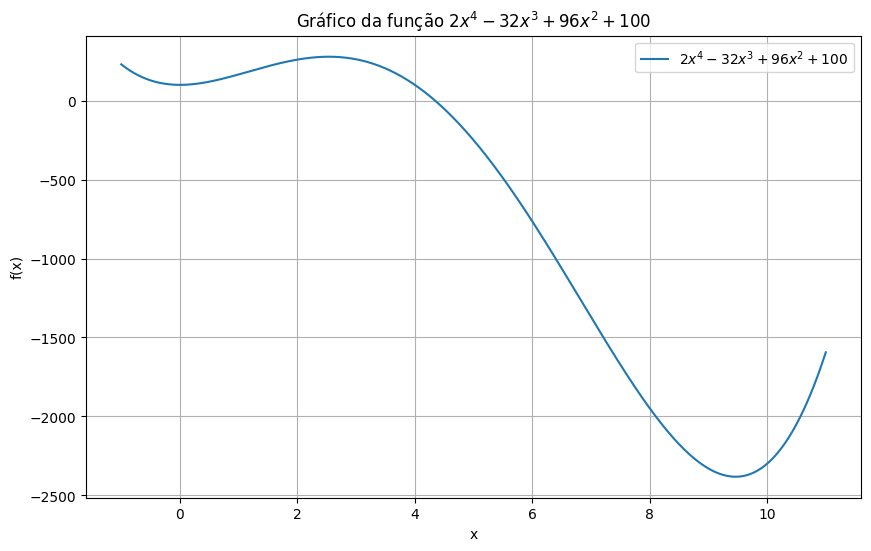

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return 2 * x**4 - 32 * x**3 + 96 * x**2 + 100

# calculando y
x_values = np.linspace(-1, 11, 1000)  # 1000 pontos entre -1 e 11
y_values = func(x_values)

# Traçando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='$2x^4 - 32x^3 + 96x^2 + 100$')
plt.title('Gráfico da função $2x^4 - 32x^3 + 96x^2 + 100$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Precisa modificar este código ele não está encontrando o zero.
# Define uma função `f` que recebe um argumento `x` e retorna o valor de um polinômio de quarto grau.
def f(x):
    # O polinômio é 2x^4 - 32x^3 + 96x^2 + 100.
    # Cada termo é calculado e depois todos são somados para obter o resultado.
    return 2 * x**4 - 32 * x**3 + 96 * x**2 + 100

# Define a função `eagerAdaptado`, algoritmo guloso, que busca pontos críticos de uma função dada,
# em um intervalo específico.
# Esta função adapta o passo de busca para encontrar esses pontos de forma mais precisa.
def eagerAdaptado(func, intervalo, passo_inicial, refinamentos, divisoes):
    # Inicializa os extremos do intervalo a partir do parâmetro `intervalo`.
    x_min = intervalo[0]  # Limite inferior do intervalo de busca.
    x_max = intervalo[1]  # Limite superior do intervalo de busca.

    # Define o passo inicial de busca.
    passo = passo_inicial

    # Inicializa uma lista para armazenar os pontos críticos encontrados.
    pontos_criticos = []

    # Executa o processo de busca um número `refinamentos + 1` vezes.
    for _ in range(refinamentos + 1):
        # Inicializa `x` no limite inferior do intervalo.
        x = x_min

        # Calcula o valor da função no ponto inicial e armazena em `anterior`.
        anterior = func(x)

        # Inicializa a variável `crescente` como None. Esta variável é usada para rastrear a mudança na direção do gradiente da função.
        crescente = None

        # Continua a busca enquanto `x` estiver dentro do intervalo especificado.
        while x < x_max:
            # Incrementa `x` pelo valor de `passo`.
            x += passo

            # Calcula o valor atual da função.
            atual = func(x)

            # Determina se a função está em uma fase crescente ou decrescente.
            if crescente is None:
                crescente = atual > anterior
            elif crescente and atual < anterior:
                # Se a função estava crescendo e agora está decrescendo, um ponto crítico foi encontrado.
                pontos_criticos.append(x - passo / 2)
                crescente = False
            elif not crescente and atual > anterior:
                # Se a função estava decrescendo e agora está crescendo, um ponto crítico foi encontrado.
                pontos_criticos.append(x - passo / 2)
                crescente = True

            # Atualiza `anterior` com o valor de `atual` para a próxima iteração.
            anterior = atual

        # Refina o `passo` dividindo pelo número de `divisoes` para uma busca mais detalhada na próxima iteração.
        passo /= divisoes

    # Retorna a lista de pontos críticos encontrados.
    return pontos_criticos

# Define os parâmetros para a busca dos pontos críticos.
intervalo = (0, 10)         # Intervalo de busca.
passo_inicial = 1           # Passo inicial para a busca.
refinamentos = 3            # Número de vezes para refinar a busca.
divisoes = 100              # Fator de divisão para refinar o passo de busca.

# Executa a função `eagerAdaptado` com a função `f` e os parâmetros definidos.
pontos_criticos = eagerAdaptado(f, intervalo, passo_inicial, refinamentos, divisoes)

# Imprime os pontos críticos encontrados.
print("Pontos críticos encontrados:")
for x in pontos_criticos:
    print("x = {:.5f}".format(x))  # Formata e exibe cada ponto crítico com 5 casas decimais.


Pontos críticos encontrados:
x = 3.50000
x = 9.50000
x = 2.54500
x = 9.46500
x = 2.53595
x = 9.46415
x = 2.53590
x = 9.46410


In [ ]:
# Precisamos saber o resultado algébricamente
import sympy as sp

# Função f(x)
x = sp.Symbol('x')
f_x = 2 * x**4 - 32 * x**3 + 96 * x**2 + 100

# Encontrar derivada e resolver para pontos críticos
f_prime_x = sp.diff(f_x, x)
pontos_criticos_algebricos = sp.solve(f_prime_x, x)

# Comparar os resultados
def erro(pontos_numericos, pontos_algebricos):
    min_error = float('inf')
    for p_num in pontos_numericos:
        min_error_temp = float('inf')
        for p_alg in pontos_algebricos:
            error = abs(float(p_num) - float(p_alg))
            if error < min_error_temp:
                min_error_temp = error
        if min_error_temp < min_error:
            min_error = min_error_temp
    return min_error

erro_encontrado = erro(pontos_criticos, pontos_criticos_algebricos)

print("Pontos críticos algebricamente: ")
for p in pontos_criticos_algebricos:
    print("x = {:.5f}".format(p.evalf()))

print("Pontos críticos encontrados:")
for x in pontos_criticos:
    print("x = {:.5f}".format(x))

print("Erro entre os valores exatos e os valores numéricos: {:.5f}".format(erro_encontrado))


Pontos críticos algebricamente: 
x = 0.00000
x = 2.53590
x = 9.46410
Pontos críticos encontrados:
x = 3.50000
x = 9.50000
x = 2.54500
x = 9.46500
x = 2.53595
x = 9.46415
x = 2.53590
x = 9.46410
Erro entre os valores exatos e os valores numéricos: 0.00000


## Algebricamente

Derivada da função $f(x)$:
$$\frac{d}{dx}f(x) = \frac{d}{dx} (2x^4 - 32x^3 + 96x^2 + 100)$$

$$\frac{d}{dx}f(x) = 8x^3 - 96x^2 + 192x$$

Encontre as raízes da derivada:
$$8x^3 - 96x^2 + 192x = 0$$
$$8x(x^2 - 12x + 24) = 0$$

Encontre os valores de $x$ onde $\frac{d}{dx}f(x) = 0$:
$x = 0$ (já que $8x = 0$)
$x = x_1$, $x_2$ (raízes do polinômio quadrático $x^2 - 12x + 24$)

Para encontrar $x_1$ e $x_2$, usamos a fórmula quadrática:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Para a equação $x^2 - 12x + 24$:

$a = 1$, $b = -12$, $c = 24$

$$x = \frac{12 \pm \sqrt{(-12)^2 - 4(1)(24)}}{2(1)}$$

$$x = \frac{12 \pm \sqrt{144 - 96}}{2}$$

$$x = \frac{12 \pm \sqrt{48}}{2}$$

$$x = 6 \pm \sqrt{12}$$

Então, $x_1 = 6 + \sqrt{12} \quad \textrm{e} \quad x_2 = 6 - \sqrt{12}$

Os pontos críticos de $f(x)$ são:
$$x = 0$$, $$x = 6 + \sqrt{12}$$, $$x = 6 - \sqrt{12}$$

O que é ótimo, mas não sei se são máximos locais, ou mínimos locais. Para definir isso, vamos testar a concavidade.



In [ ]:
import numpy as np
import plotly.graph_objects as go

def f(x):
    return 2 * x**4 - 32 * x**3 + 96 * x**2 + 100

# usando o linspace para gerar valores de x tal que -1 < x < 11
x_values = np.linspace(-1, 11, 1000)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x_values, y=f(x_values), mode='lines', name='f(x)'))

# Pontos onde as linhas verticais tocam o eixo x
x_points = [0, 9.4641, 2.5359]

# Adicionando linhas verticais que se estendem até o eixo x
for x in x_points:
    fig.add_shape(type="line", x0=x, y0=0, x1=x, y1=f(x), line=dict(color="Orange", width=2))
    fig.add_annotation(x=x, y=-10, text=str(round(x, 2)), showarrow=False, yshift=-10)

fig.update_layout(title='Gráficos das funções f(x)',
                  xaxis_title='x',
                  yaxis_title='f(x)',
                  legend_title='Funções',
                  showlegend=True)

fig.show()


### Concavidade, máximos e mínimos

A **concavidade** de uma função é a propriedade que descreve a curvatura da função em um ponto.

> a) Se a curva é "aberta para cima" (forma uma parábola côncava para cima), a função é dita ser côncava para cima.

> b) Se a curva é "aberta para baixo" (forma uma parábola côncava para baixo), a função é dita ser côncava para baixo.

**A concavidade de uma função é determinada pela segunda derivada da função.**

Considere a função $f(x)$. Um ponto de inflexão é um ponto onde a concavidade da função muda, ou seja, a segunda derivada $\frac{d^2}{dx^2}f(x)$ muda de sinal. Se $\frac{d^2}{dx^2}f(x) > 0$, a função é côncava para cima, e se $\frac{d^2}{dx^2}f(x) < 0$, a função é côncava para baixo.

Um **ponto crítico** de $f(x)$ é um ponto onde a derivada primeira $\frac{d}{dx}f(x) = 0$ ou não está definida. Se a derivada segunda $\frac{d^2}{dx^2}f(x)$ existe e é diferente de zero em um ponto crítico, podemos usar a concavidade para determinar se o ponto crítico é um ponto de máximo local ou mínimo local.

- Se $\frac{d^2}{dx^2}f(x) > 0$ em um ponto crítico, então a função é **côncava para cima, o ponto crítico é um mínimo local**.
- Se $\frac{d^2}{dx^2}f(x) < 0$ em um ponto crítico, então a função é **côncava para baixo, o ponto crítico é um máximo local**.



Voltando a nossa função. Já encontramos $\frac{d}{dx}f(x)$:

$$ \frac{d}{dx}f(x) = 8x^3 - 96x^2 + 192x$$

Agora, vamos calcular a segunda derivada de $f(x)$ e testar a concavidade nos pontos críticos:

Segunda derivada da função f(x):

$$\frac{d^2}{dx^2} (2x^4 - 32x^3 + 96x^2 + 192x)$$

será a derivada de $ \frac{d}{dx}f(x) = 8x^3 - 96x^2 + 192x$

$$\frac{d^2}{dx^2}f(x) = 24x^2 - 192x + 192$$

Teste de concavidade nos pontos críticos $x = 0$, $x = 6 + \sqrt{12}$, e $x = 6 - \sqrt{12}$:

a) Para $x = 0$:

$$\frac{d^2}{dx^2}f(0) = 24(0)^2 - 192(0) + 192 = 192$$

Como $\frac{d^2}{dx^2}f(0) > 0$, a função é côncava para cima neste ponto, e $x = 0$ é um ponto de mínimo local.

b) Para $x = 6 + \sqrt{12}$:

$$\frac{d^2}{dx^2}f(6 + \sqrt{12}) = 24(6 + \sqrt{12})^2 - 192(6 + \sqrt{12}) + 192 = 47.1722$$

Em $x = 6 + \sqrt{12}$ temos um mínimo local.

c) Para $x = 6 - \sqrt{12}$:

$$\frac{d^2}{dx^2}f(6 - \sqrt{12}) = 24(6 - \sqrt{12})^2 - 192(6 - \sqrt{12}) + 192=-140.5538$$

Em $x = 6 - \sqrt{12}$ temos um mínimo local



#Mesmo problema, função diferente

Computadores não são capazes de abstração algébrica, a menos que usemos algoritmos complexos para tanto. Sem usar qualquer abstração algébrica, e usando apenas as operações algébricas. Crie um algoritmo, usando Python e o Google Colaboratory, sem consultar qualquer ferramenta de inteligência artificial, ou buscar no Google, que permita encontrar os pontos de máximo e mínimo da função a seguir que existam no intervalo $0<=x<=10$.

$$g(x) = x^4 - 20x^3 + 100x^2 + 100$$

Além do programa em python, você pode refazer todo o procedimento algébrico que fizemos, e traçar os gráficos da função e de suas derivadas.

In [ ]:
# Instale a biblioteca Plotly, caso não esteja instalada
!pip install plotly

import numpy as np
import plotly.graph_objects as go

def g(x):
    return x**4 - 20 * x**3 + 100 * x**2 + 100

# Gere valores de x no intervalo 0 < x < 10
x_values = np.linspace(-1, 11, 1000)

# Trace os gráficos de g(x) usando Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=g(x_values), mode='lines', name='g(x)'))

fig.update_layout(title='Gráficos das funções f(x) ',
                  xaxis_title='x',
                  yaxis_title='f(x)',
                  legend_title='f(x)')

fig.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
